# Time Series

## Simple Exponential Smoothing 

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
%matplotlib inline


In [2]:
data = [446.6565,  454.4733,  455.663 ,  423.6322,  456.2713,  440.5881, 425.3325,  485.1494,  506.0482,  526.792 ,  514.2689,  494.211 ]
index= pd.date_range(start='1996', end='2008', freq='A')
oildata = pd.Series(data, index)

data = [17.5534,  21.86  ,  23.8866,  26.9293,  26.8885,  28.8314, 30.0751,  30.9535,  30.1857,  31.5797,  32.5776,  33.4774, 39.0216,  41.3864,  41.5966]
index= pd.date_range(start='1990', end='2005', freq='A')
air = pd.Series(data, index)

data = [263.9177,  268.3072,  260.6626,  266.6394,  277.5158,  283.834 , 290.309 ,  292.4742,  300.8307,  309.2867,  318.3311,  329.3724, 338.884 ,  339.2441,  328.6006,  314.2554,  314.4597,  321.4138, 329.7893,  346.3852,  352.2979,  348.3705,  417.5629,  417.1236, 417.7495,  412.2339,  411.9468,  394.6971,  401.4993,  408.2705, 414.2428]
index= pd.date_range(start='1970', end='2001', freq='A')
livestock2 = pd.Series(data, index)

data = [407.9979 ,  403.4608,  413.8249,  428.105 ,  445.3387,  452.9942, 455.7402]
index= pd.date_range(start='2001', end='2008', freq='A')
livestock3 = pd.Series(data, index)

data = [41.7275,  24.0418,  32.3281,  37.3287,  46.2132,  29.3463, 36.4829,  42.9777,  48.9015,  31.1802,  37.7179,  40.4202, 51.2069,  31.8872,  40.9783,  43.7725,  55.5586,  33.8509, 42.0764,  45.6423,  59.7668,  35.1919,  44.3197,  47.9137]
index= pd.date_range(start='2005', end='2010-Q4', freq='QS-OCT')
aust = pd.Series(data, index)

Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.


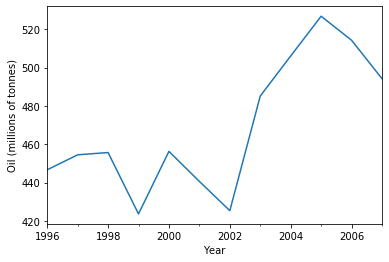

In [3]:
ax=oildata.plot()
ax.set_xlabel("Year")
ax.set_ylabel("Oil (millions of tonnes)")
print("Figure 7.1: Oil production in Saudi Arabia from 1996 to 2007.")

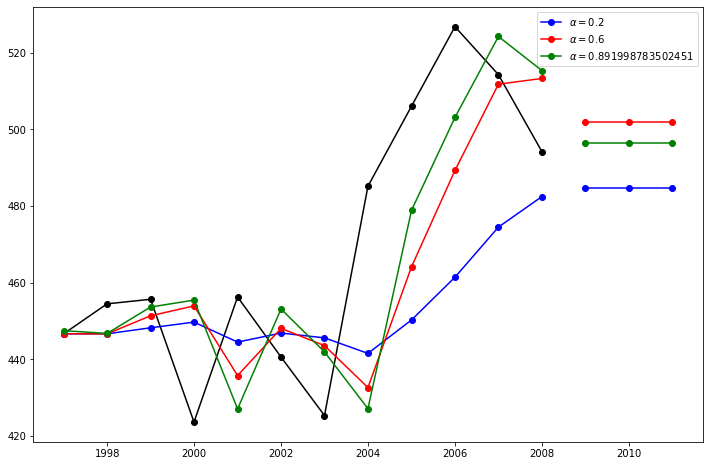

In [5]:
fit1 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(3).rename(r'$\alpha=0.2$')
fit2 = SimpleExpSmoothing(oildata).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(3).rename(r'$\alpha=0.6$')
fit3 = SimpleExpSmoothing(oildata,).fit()
fcast3 = fit3.forecast(3).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])

plt.figure(figsize=(12, 8))
plt.plot(oildata, marker='o', color='black')
plt.plot(fit1.fittedvalues, marker='o', color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, marker='o', color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, marker='o', color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

## Holt's Method

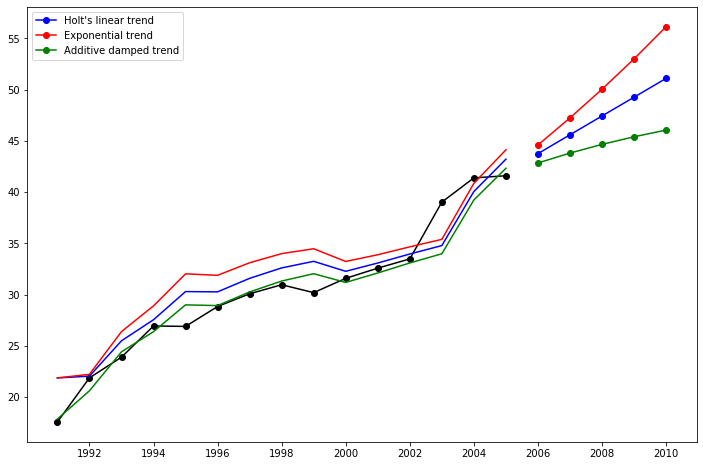

In [9]:
fit1 = Holt(air).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(5).rename("Holt's linear trend")
fit2 = Holt(air, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(5).rename("Exponential trend")
fit3 = Holt(air, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(5).rename("Additive damped trend")

plt.figure(figsize=(12, 8))
plt.plot(air, marker='o', color='black')
plt.plot(fit1.fittedvalues, color='blue')
line1, = plt.plot(fcast1, marker='o', color='blue')
plt.plot(fit2.fittedvalues, color='red')
line2, = plt.plot(fcast2, marker='o', color='red')
plt.plot(fit3.fittedvalues, color='green')
line3, = plt.plot(fcast3, marker='o', color='green')
plt.legend([line1, line2, line3], [fcast1.name, fcast2.name, fcast3.name])

## Seasonally adjusted data

In [14]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fit2 = Holt(livestock2).fit()
fit3 = Holt(livestock2,exponential=True).fit()
fit4 = Holt(livestock2,damped=True).fit(damping_slope=0.98)
fit5 = Holt(livestock2,exponential=True, damped=True).fit()
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'initial_level', 'initial_slope']
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$l_0$","$b_0$","SSE"] ,columns=['SES', "Holt's","Exponential", "Additive", "Multiplicative"])
results["SES"] =            [fit1.params[p] for p in params] + [fit1.sse]
results["Holt's"] =         [fit2.params[p] for p in params] + [fit2.sse]
results["Exponential"] =    [fit3.params[p] for p in params] + [fit3.sse]
results["Additive"] =       [fit4.params[p] for p in params] + [fit4.sse]
results["Multiplicative"] = [fit5.params[p] for p in params] + [fit5.sse]
results

,SES,Holt's,Exponential,Additive,Multiplicative
$\alpha$,1.000000,0.974306,0.977633,0.978847,0.974911
$\beta$,NaN,0.000000,0.000000,0.000000,0.000000
$\phi$,NaN,NaN,NaN,0.980000,0.981646
$l_0$,263.917700,258.882647,260.341560,257.357648,258.951730
$b_0$,NaN,5.010775,1.013780,6.511647,1.019091
SSE,6761.350218,6004.138200,6104.194746,6036.555004,6081.995045


## Plots of Seasonally Adjusted Data

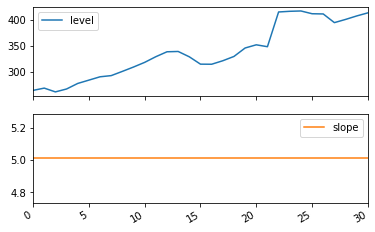

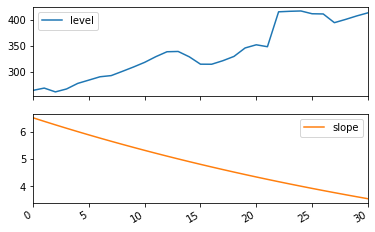

Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.


In [16]:
for fit in [fit2,fit4]:
    pd.DataFrame(np.c_[fit.level,fit.slope]).rename(
        columns={0:'level',1:'slope'}).plot(subplots=True)
plt.show()
print('Figure 7.4: Level and slope components for Holt’s linear trend method and the additive damped trend method.')

## Comparison

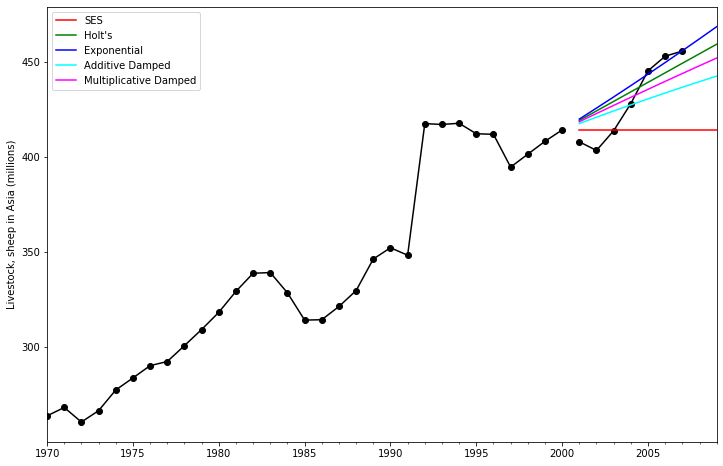

Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.


In [18]:
fit1 = SimpleExpSmoothing(livestock2).fit()
fcast1 = fit1.forecast(9).rename("SES")
fit2 = Holt(livestock2).fit()
fcast2 = fit2.forecast(9).rename("Holt's")
fit3 = Holt(livestock2, exponential=True).fit()
fcast3 = fit3.forecast(9).rename("Exponential")
fit4 = Holt(livestock2, damped=True).fit(damping_slope=0.98)
fcast4 = fit4.forecast(9).rename("Additive Damped")
fit5 = Holt(livestock2, exponential=True, damped=True).fit()
fcast5 = fit5.forecast(9).rename("Multiplicative Damped")

ax = livestock2.plot(color="black", marker="o", figsize=(12,8))
livestock3.plot(ax=ax, color="black", marker="o", legend=False)
fcast1.plot(ax=ax, color='red', legend=True)
fcast2.plot(ax=ax, color='green', legend=True)
fcast3.plot(ax=ax, color='blue', legend=True)
fcast4.plot(ax=ax, color='cyan', legend=True)
fcast5.plot(ax=ax, color='magenta', legend=True)
ax.set_ylabel('Livestock, sheep in Asia (millions)')
plt.show()
print('Figure 7.5: Forecasting livestock, sheep in Asia: comparing forecasting performance of non-seasonal methods.')

## Holt's Winters Seasonal

C:\Users\burge\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
C:\Users\burge\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


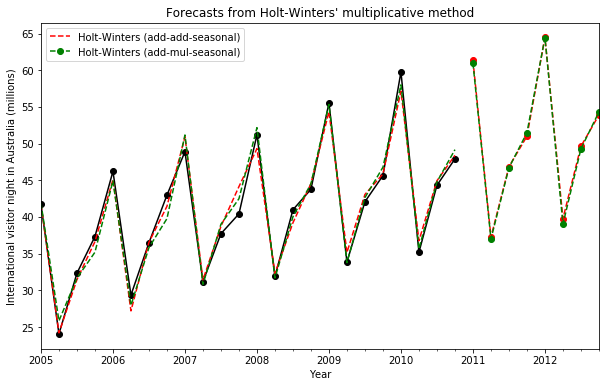

Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.


,Additive,Multiplicative,Additive Dam,Multiplica Dam
$\alpha$,4.546195e-01,3.659543e-01,6.194917e-09,0.000190
$\beta$,3.682627e-25,2.230501e-20,2.244538e-10,0.000190
$\phi$,NaN,NaN,9.429509e-01,0.912804
$\gamma$,5.244412e-01,3.232564e-14,2.917832e-07,0.000000
$l_0$,1.421751e+01,1.454813e+01,1.415722e+01,14.535653
$b_0$,1.307798e-01,1.661310e-01,2.318939e-01,0.440082
SSE,5.001645e+01,4.307040e+01,3.527985e+01,39.676413


In [23]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
results=pd.DataFrame(index=[r"$\alpha$",r"$\beta$",r"$\phi$",r"$\gamma$",r"$l_0$","$b_0$","SSE"])
params = ['smoothing_level', 'smoothing_slope', 'damping_slope', 'smoothing_seasonal', 'initial_level', 'initial_slope']
results["Additive"]       = [fit1.params[p] for p in params] + [fit1.sse]
results["Multiplicative"] = [fit2.params[p] for p in params] + [fit2.sse]
results["Additive Dam"]   = [fit3.params[p] for p in params] + [fit3.sse]
results["Multiplica Dam"] = [fit4.params[p] for p in params] + [fit4.sse]

ax = aust.plot(figsize=(10,6), marker='o', color='black', title="Forecasts from Holt-Winters' multiplicative method" )
ax.set_ylabel("International visitor night in Australia (millions)")
ax.set_xlabel("Year")
fit1.fittedvalues.plot(ax=ax, style='--', color='red')
fit2.fittedvalues.plot(ax=ax, style='--', color='green')

fit1.forecast(8).rename('Holt-Winters (add-add-seasonal)').plot(ax=ax, style='--', marker='o', color='red', legend=True)
fit2.forecast(8).rename('Holt-Winters (add-mul-seasonal)').plot(ax=ax, style='--', marker='o', color='green', legend=True)

plt.show()
print("Figure 7.6: Forecasting international visitor nights in Australia using Holt-Winters method with both additive and multiplicative seasonality.")

results

## The Internals

In [26]:
fit1 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='add').fit()
fit2 = ExponentialSmoothing(aust, seasonal_periods=4, trend='add', seasonal='mul').fit()
df = pd.DataFrame(np.c_[aust, fit1.level, fit1.slope, fit1.season, fit1.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit1.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

C:\Users\burge\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters.py:711: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,41.945935,1.007997,50.081837,-8.354337,41.7275
2005-04-01,24.571441,0.952927,50.866828,-26.825028,24.0418
2005-07-01,32.805765,0.903262,51.618633,-19.290533,32.3281
2005-10-01,38.039258,0.829381,52.222713,-14.894013,37.3287
2006-01-01,44.697757,0.986950,53.690175,-7.476975,46.2132
2006-04-01,27.852098,1.142311,55.306263,-25.959963,29.3463
2006-07-01,37.158041,1.072113,56.164304,-19.681404,36.4829
2006-10-01,42.342404,1.138168,57.503910,-14.526210,42.9777
2007-01-01,51.165103,0.902808,57.688982,-8.787482,48.9015
2007-04-01,32.631827,0.751875,57.980579,-26.800379,31.1802


In [28]:
df = pd.DataFrame(np.c_[aust, fit2.level, fit2.slope, fit2.season, fit2.fittedvalues],
                  columns=[r'$y_t$',r'$l_t$',r'$b_t$',r'$s_t$',r'$\hat{y}_t$'],index=aust.index)
df.append(fit2.forecast(8).rename(r'$\hat{y}_t$').to_frame(), sort=True)

,$\hat{y}_t$,$b_t$,$l_t$,$s_t$,$y_t$
2005-01-01,43.006012,0.91291,51.480911,0.835378,41.7275
2005-04-01,26.352424,0.91291,52.393821,0.502968,24.0418
2005-07-01,33.284850,0.91291,53.306731,0.624402,32.3281
2005-10-01,36.720311,0.91291,54.219641,0.677251,37.3287
2006-01-01,46.056511,0.91291,55.132551,0.835378,46.2132
2006-04-01,28.189082,0.91291,56.045461,0.502968,29.3463
2006-07-01,35.564942,0.91291,56.958371,0.624402,36.4829
2006-10-01,39.193388,0.91291,57.871282,0.677251,42.9777
2007-01-01,49.107010,0.91291,58.784192,0.835378,48.9015
2007-04-01,30.025741,0.91291,59.697102,0.502968,31.1802


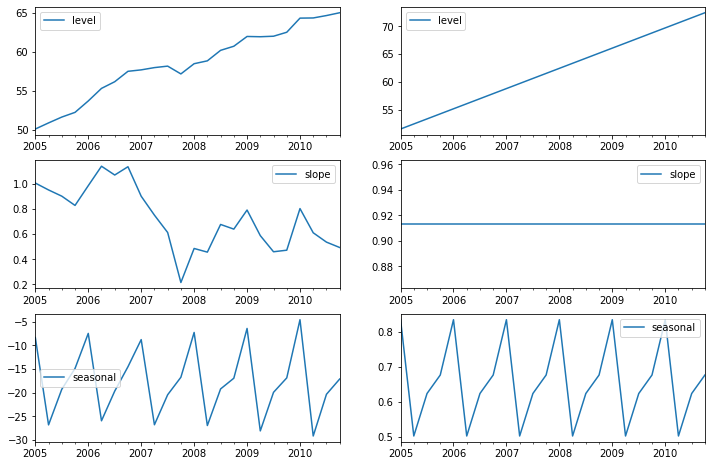

In [30]:
states1 = pd.DataFrame(np.c_[fit1.level, fit1.slope, fit1.season], columns=['level','slope','seasonal'], index=aust.index)
states2 = pd.DataFrame(np.c_[fit2.level, fit2.slope, fit2.season], columns=['level','slope','seasonal'], index=aust.index)
fig, [[ax1, ax4],[ax2, ax5], [ax3, ax6]] = plt.subplots(3, 2, figsize=(12,8))
states1[['level']].plot(ax=ax1)
states1[['slope']].plot(ax=ax2)
states1[['seasonal']].plot(ax=ax3)
states2[['level']].plot(ax=ax4)
states2[['slope']].plot(ax=ax5)
states2[['seasonal']].plot(ax=ax6)
plt.show()